<a href="https://colab.research.google.com/github/Pranshu244/Sales-Prediction-Project/blob/main/Linear%20Regression%20Model/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [70]:
df=pd.read_csv('Advertising Budget and Sales.csv')
x_pd=df.iloc[:,1:4]
y_pd=df.iloc[:,4]
x_np=x_pd.to_numpy()
y_np=y_pd.to_numpy()
x_train,x_test,y_train,y_test=train_test_split(x_np,y_np,test_size=0.2,random_state=42)
x_features=['TV AD Budget','Radio AD Budget','Newspaper AD Budget']

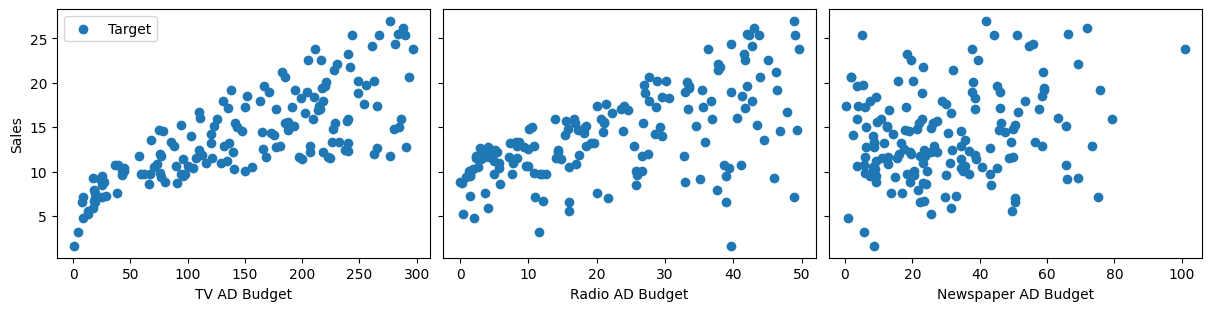

In [71]:
fig,ax=plt.subplots(1,3,figsize=(12,3),constrained_layout=True,sharey=True)
for i in range(len(ax)):
  ax[i].scatter(x_train[:,i],y_train,label='Target')
  ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel('Sales')
ax[0].legend()
plt.show()

In [72]:
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [73]:
w=linear_model.coef_
b=linear_model.intercept_
print(f"w={w:},b={b:0.2f}")

w=[0.04472952 0.18919505 0.00276111],b=2.98


In [74]:
y_pred=linear_model.predict(x_test)

In [75]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"MSE={mse:.2f}")
print(f"RMSE={np.sqrt(mse):.2f}")
print(f"R^2={r2:.2f}")

MSE=3.17
RMSE=1.78
R^2=0.90


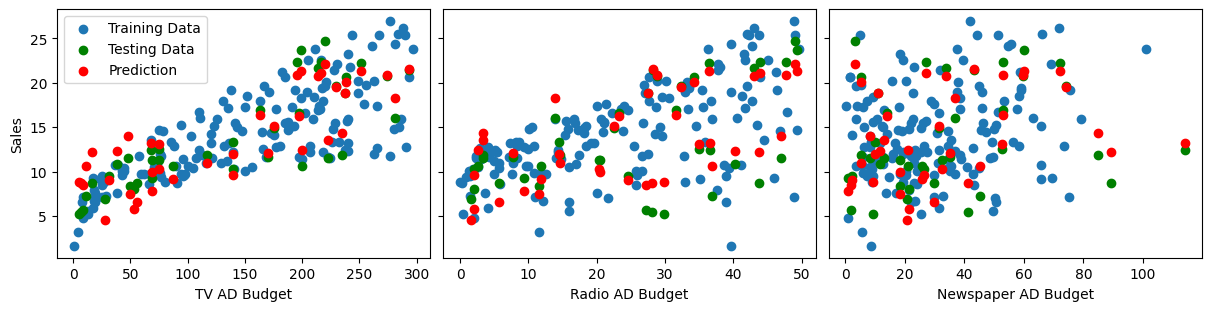

In [76]:
fig,ax=plt.subplots(1,3,figsize=(12,3),constrained_layout=True,sharey=True)
for i in range(len(ax)):
  ax[i].scatter(x_train[:,i],y_train,label='Training Data')
  ax[i].set_xlabel(x_features[i])
  ax[i].scatter(x_test[:,i],y_test,label='Testing Data',c='g')
  ax[i].scatter(x_test[:,i],y_pred,label='Prediction',c='r')
ax[0].set_ylabel('Sales')
ax[0].legend()
plt.show()

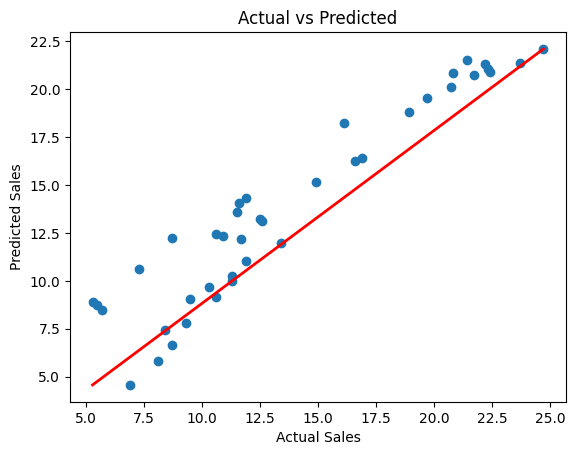

In [77]:
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(),y_test.max()],[y_pred.min(),y_pred.max()],c='r',lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted')
plt.show()

In [78]:
import pickle
with open('model.pkl','wb') as file:
  pickle.dump(linear_model,file)
print('Model saved succesfully as pkl')

Model saved succesfully as pkl
